<a href="https://colab.research.google.com/github/DeepuJose24/DJKeekarikattu/blob/main/Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [12]:
import numpy as np
from numpy.random import seed
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans

In [13]:
# prompt: to read data from csv file

df = pd.read_csv('Df2.csv', encoding='latin-1')
print(df.head())

   Sl.No  Month Company Name  C1 (kWh)  C2 (kWh)  C3  (kWh)  \
0      1      1    Overbrook   3441.40    762.60     996.80   
1      2      1    Idatalist   1088.80    366.80     130.20   
2      3      1         SPGS    807.28     78.24     148.16   
3      4      1   Ignitarium   2317.60    689.60    1312.00   
4      5      1  Unity Bees       0.00      0.00       0.00   

   C  Energy consumption (kWh)  C1 Maximum Demand (kVA)  \
0                      5200.80                   16.440   
1                      1585.80                    7.040   
2                      1033.68                    3.952   
3                      4319.20                    9.400   
4                         0.00                    0.000   

   C2 Maximum Demand (kVA)  C3 Maximum Demand (kVA)  Solar generation  
0                    13.90                    5.960                 1  
1                     6.72                    5.780                 1  
2                     1.22                    0.71

In [14]:
df.shape

(1945, 11)

In [15]:
# Removing unwanted columns
df.drop(['Sl.No'], axis=1, inplace=True)

In [16]:
#Removing the null values
df.isnull().sum()

,0
Month,0
Company Name,0
C1 (kWh),0
C2 (kWh),0
C3 (kWh),0
C Energy consumption (kWh),0
C1 Maximum Demand (kVA),1
C2 Maximum Demand (kVA),1
C3 Maximum Demand (kVA),1
Solar generation,0


In [17]:
df.isna().sum()

,0
Month,0
Company Name,0
C1 (kWh),0
C2 (kWh),0
C3 (kWh),0
C Energy consumption (kWh),0
C1 Maximum Demand (kVA),1
C2 Maximum Demand (kVA),1
C3 Maximum Demand (kVA),1
Solar generation,0


In [18]:
df['C1 Maximum Demand (kVA)']=df['C1 Maximum Demand (kVA)'].replace(np.nan,df['C1 Maximum Demand (kVA)'].mean())
df['C2 Maximum Demand (kVA)']=df['C2 Maximum Demand (kVA)'].replace(np.nan,df['C2 Maximum Demand (kVA)'].mean())
df['C3 Maximum Demand (kVA)']=df['C3 Maximum Demand (kVA)'].replace(np.nan,df['C3 Maximum Demand (kVA)'].mean())


In [19]:
df.head()

,Month,Company Name,C1 (kWh),C2 (kWh),C3 (kWh),C Energy consumption (kWh),C1 Maximum Demand (kVA),C2 Maximum Demand (kVA),C3 Maximum Demand (kVA),Solar generation
0,1,Overbrook,3441.40,762.60,996.80,5200.80,16.440,13.90,5.960,1
1,1,Idatalist,1088.80,366.80,130.20,1585.80,7.040,6.72,5.780,1
2,1,SPGS,807.28,78.24,148.16,1033.68,3.952,1.22,0.712,1
3,1,Ignitarium,2317.60,689.60,1312.00,4319.20,9.400,7.22,6.120,1
4,1,Unity Bees,0.00,0.00,0.00,0.00,0.000,0.00,0.000,1


In [20]:
df.isna().sum()

,0
Month,0
Company Name,0
C1 (kWh),0
C2 (kWh),0
C3 (kWh),0
C Energy consumption (kWh),0
C1 Maximum Demand (kVA),0
C2 Maximum Demand (kVA),0
C3 Maximum Demand (kVA),0
Solar generation,0


In [21]:
from re import S
#Grouping and perform count over each group
Month =  df.groupby('Month')['Month'].count()
print(Month)

Month
1     149
2     148
3     155
4     155
5     157
6     157
7     160
8     168
9     171
10    174
11    175
12    176
Name: Month, dtype: int64


In [22]:
df.sort_values('Month')

,Month,Company Name,C1 (kWh),C2 (kWh),C3 (kWh),C Energy consumption (kWh),C1 Maximum Demand (kVA),C2 Maximum Demand (kVA),C3 Maximum Demand (kVA),Solar generation
0,1,Overbrook,3441.40,762.60,996.80,5200.80,16.440,13.90,5.960,1
1,1,Idatalist,1088.80,366.80,130.20,1585.80,7.040,6.72,5.780,1
2,1,SPGS,807.28,78.24,148.16,1033.68,3.952,1.22,0.712,1
3,1,Ignitarium,2317.60,689.60,1312.00,4319.20,9.400,7.22,6.120,1
52,1,FAADE GLOBAL,206.00,68.67,137.30,412.00,0.790,0.74,0.692,0
...,...,...,...,...,...,...,...,...,...,...
934,12,2 HATS LOGIC,146.80,48.93,97.87,293.60,0.660,0.85,0.460,0
935,12,WING 1 - 9F,2283.00,761.00,1522.00,4566.00,10.200,13.20,7.200,0
936,12,WING 2 - 9F,3265.00,1088.33,2176.67,6530.00,14.600,19.00,10.300,0
1913,12,Transasia-10G,526.40,111.80,63.10,701.30,3.200,0.20,0.200,0


In [23]:
df.groupby(['Month'] )['C1 (kWh)'].sum()

,C1 (kWh)
Month,
1,176691.0205
2,166066.9300
3,197015.9500
4,180060.6350
5,210989.1200
6,191395.0450
7,196462.4400
8,199371.6100
9,214751.7900


In [24]:
df.head()

,Month,Company Name,C1 (kWh),C2 (kWh),C3 (kWh),C Energy consumption (kWh),C1 Maximum Demand (kVA),C2 Maximum Demand (kVA),C3 Maximum Demand (kVA),Solar generation
0,1,Overbrook,3441.40,762.60,996.80,5200.80,16.440,13.90,5.960,1
1,1,Idatalist,1088.80,366.80,130.20,1585.80,7.040,6.72,5.780,1
2,1,SPGS,807.28,78.24,148.16,1033.68,3.952,1.22,0.712,1
3,1,Ignitarium,2317.60,689.60,1312.00,4319.20,9.400,7.22,6.120,1
4,1,Unity Bees,0.00,0.00,0.00,0.00,0.000,0.00,0.000,1


/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128 (\x80) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


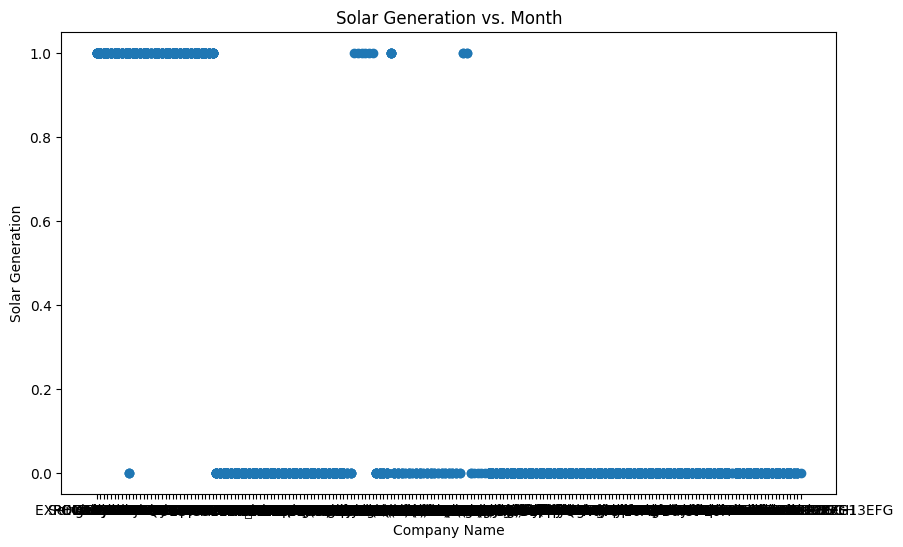

In [25]:
# prompt: Using dataframe df: scatter plot for Solar generation Vs Month

import matplotlib.pyplot as plt
df.groupby(['Company Name'] )['Solar generation'].sum()
# Create the scatter plot
plt.figure(figsize=(10, 6))  # Adjust figure size as needed
plt.scatter(df['Company Name'], df['Solar generation'])

# Add labels and title
plt.xlabel('Company Name')
plt.ylabel('Solar Generation')
plt.title('Solar Generation vs. Month')

# Display the plot
plt.show()


In [26]:
# prompt: To group Company Name with Solar generation

solar_generation_by_company = df.groupby('Company Name')['Solar generation'].sum()
solar_generation_by_company


,Solar generation
Company Name,
(6A4) CL:,0
2 HATS LOGIC,0
ABACYS(MWh),0
ACABES,12
ACABES (6B1),0
...,...
YATHNAM,0
Zahdam-13A2,0
Zealogics-9A1,0


/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128 (\x80) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


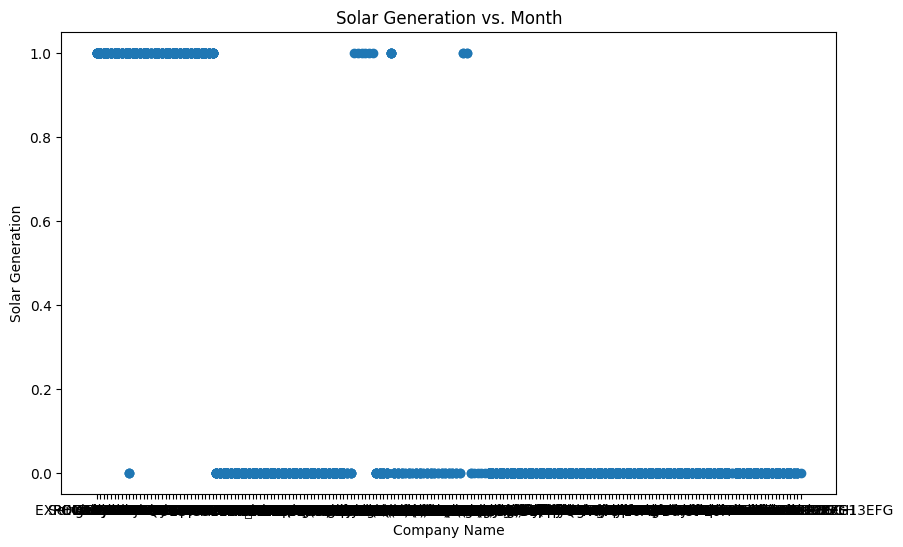

In [27]:
# prompt: Using dataframe df: scatter plot for Solar generation Vs Month

import matplotlib.pyplot as plt
# Create the scatter plot
plt.figure(figsize=(10, 6))  # Adjust figure size as needed
plt.scatter(df['Company Name'], df['Solar generation'])

# Add labels and title
plt.xlabel('Company Name')
plt.ylabel('Solar Generation')
plt.title('Solar Generation vs. Month')

# Display the plot
plt.show()


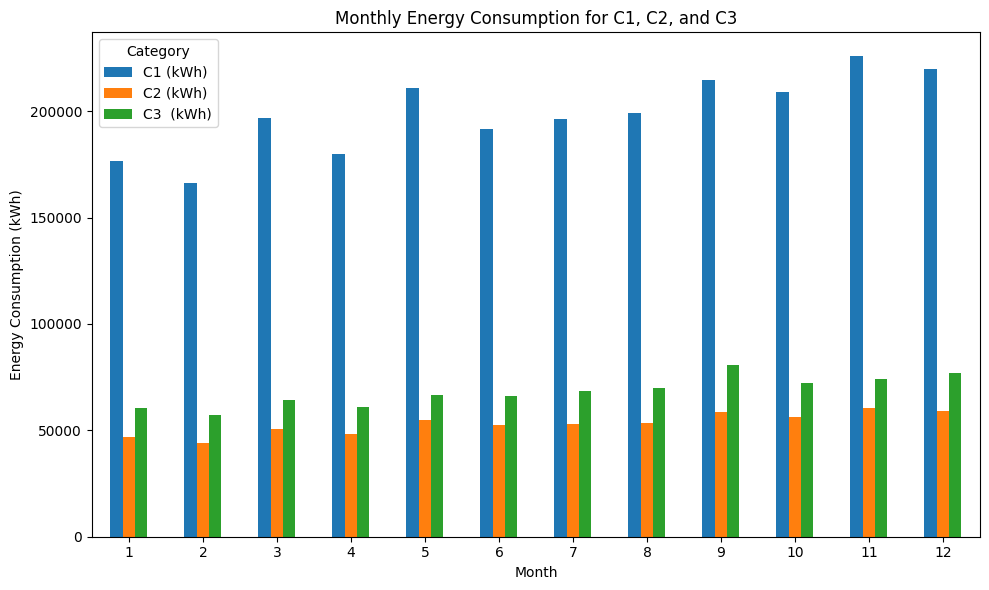

In [28]:
# prompt: Using dataframe df: bar plot C1(kWh), C2(kWh) and C3(kWh) Vs Month

import matplotlib.pyplot as plt

# Group data by month and sum energy consumption for each C
monthly_consumption = df.groupby('Month')[['C1 (kWh)', 'C2 (kWh)', 'C3  (kWh)']].sum()

# Create the bar plot
monthly_consumption.plot(kind='bar', figsize=(10, 6))
plt.xlabel('Month')
plt.ylabel('Energy Consumption (kWh)')
plt.title('Monthly Energy Consumption for C1, C2, and C3')
plt.xticks(rotation=0)  # Rotate x-axis labels for better readability
plt.legend(title='Category')
plt.tight_layout() # Adjust layout to prevent labels from overlapping
plt.show()


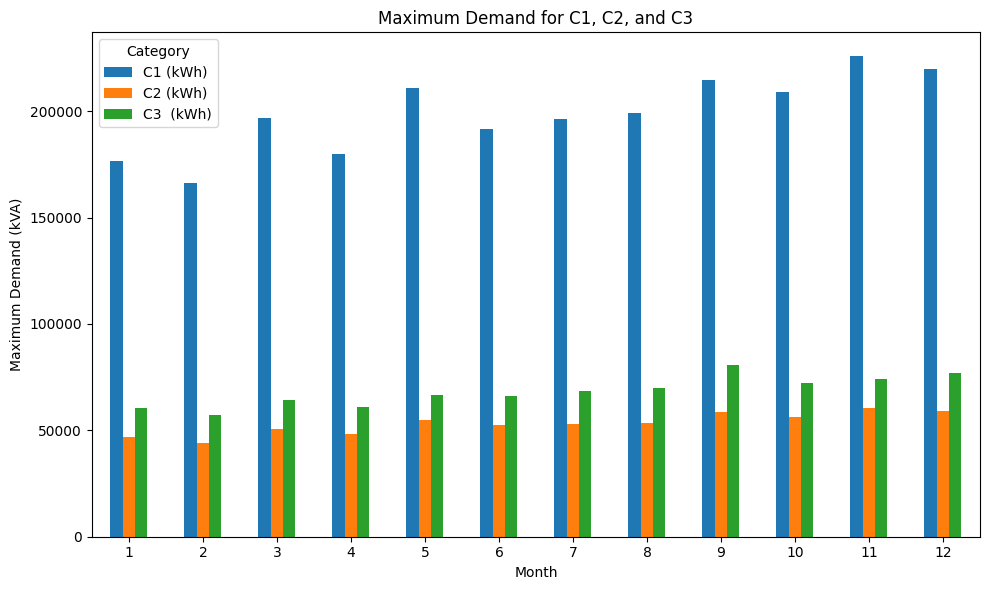

In [29]:
# prompt: Using dataframe df: bar plot C1 Maximum Demand(kVA), C2 Maximum Demand(kVA) and C3 Maximum Demand(kVA) Vs Month

import matplotlib.pyplot as plt

# Group data by month and sum Maximum Demand for each C
monthly_demand = df.groupby('Month')[['C1 Maximum Demand (kVA)', 'C2 Maximum Demand (kVA)', 'C3 Maximum Demand (kVA)']].sum()

# Create the bar plot
monthly_consumption.plot(kind='bar', figsize=(10, 6))
plt.xlabel('Month')
plt.ylabel('Maximum Demand (kVA)')
plt.title('Maximum Demand for C1, C2, and C3')
plt.xticks(rotation=0)  # Rotate x-axis labels for better readability
plt.legend(title='Category')
plt.tight_layout() # Adjust layout to prevent labels from overlapping
plt.show()


<ipython-input-30-6b60d43874a9>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['C1 (kWh)'])
<ipython-input-30-6b60d43874a9>:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['C2 (kWh)'])
<ipython-input-30-6b60d43874a9>:10: UserWarning: 

`distplot` is a deprecated function and will be rem

Text(0.5, 1.0, 'C3 (kWh)')

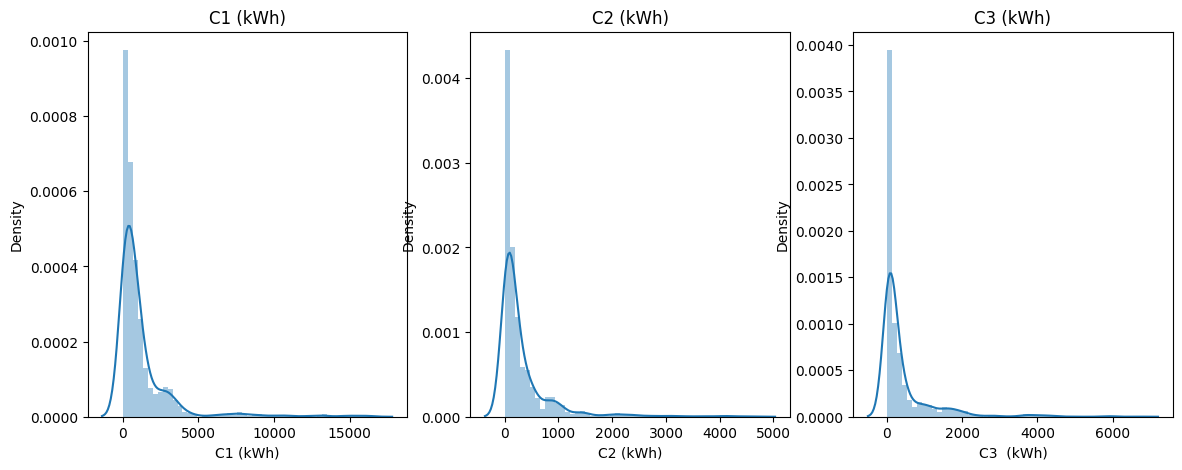

In [30]:
%matplotlib inline
plt.figure(figsize=(14,5))
plt.subplot(1,3,1)
sns.distplot(df['C1 (kWh)'])
plt.title('C1 (kWh)')
plt.subplot(1,3,2)
sns.distplot(df['C2 (kWh)'])
plt.title('C2 (kWh)')
plt.subplot(1,3,3)
sns.distplot(df['C3  (kWh)'])
plt.title('C3 (kWh)')

In [31]:
df.groupby(['Month'], sort=True)['C3  (kWh)'].sum()

,C3 (kWh)
Month,
1,60536.100
2,57012.833
3,64310.270
4,60984.250
5,66432.370
6,66007.820
7,68349.270
8,70110.500
9,80921.440


In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1945 entries, 0 to 1944
Data columns (total 10 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Month                        1945 non-null   int64  
 1   Company Name                 1945 non-null   object 
 2   C1 (kWh)                     1945 non-null   float64
 3   C2 (kWh)                     1945 non-null   float64
 4   C3  (kWh)                    1945 non-null   float64
 5   C  Energy consumption (kWh)  1945 non-null   float64
 6   C1 Maximum Demand (kVA)      1945 non-null   float64
 7   C2 Maximum Demand (kVA)      1945 non-null   float64
 8   C3 Maximum Demand (kVA)      1945 non-null   float64
 9   Solar generation             1945 non-null   int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 152.1+ KB


In [33]:
df['Month'].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12])

In [34]:
len(df['Month'].unique())

12

In [35]:
df['Company Name'].unique()

array(['Overbrook', 'Idatalist', 'SPGS', 'Ignitarium', 'Unity Bees ',
       'Serve Sys Feeder 2', 'Cavli wireless', 'INNTOT', 'TERAOBJECTS',
       'CAVLI WIRELESS', 'ACABUS', 'EDSTEM', 'ARMIA', 'HEIDEL SOFT',
       'REGENT GLOBAL SERVICES', 'DBM VIRCON',
       'EXPONENTIAL DIGITAL SOLUTIONS', 'DYNAMED', 'MITSOGO',
       'SURVEY SPARROW', 'NOMD', 'ALIGN MINDS TECH PVT LTD', 'D3 TECH',
       'AIR PAY', 'VOXTRON', 'Common Area', 'Spare', 'FETHER SOFT',
       'ACABES', 'QUEST GLOBAL', 'Spare 2', 'Common Area WB', 'EPI Use',
       'Jio- construction', 'BSNL-construction', 'SHOP 1', 'SHOP 2',
       'SHOP 3', 'SHOP 4', 'SHOP 5', 'S.S CONSULTING SHOP 6',
       'S.S CONSULTING SHOP 7 ', 'SHOP 8', 'ATM', 'RAINY BITS', 'DEEROM',
       'ICICI BANK', 'CYBER DOME', 'CAVLI WIRELESS (KWh)',
       'UROLIME (MWh)', 'DFM', 'ABACYS(MWh)', 'FA\x80ADE GLOBAL',
       'KOTT SOFT 1', 'KOTT SOFT 2', 'NEXA SQUARE', 'TUTTI FRUTTI',
       'DYNACTONIZE', 'NETSENTRIES', 'Techgentsia', 'DAZE WORKS',
   

In [36]:
len(df['Company Name'].unique())

195

In [37]:
df['C3  (kWh)'].unique()

array([ 996.8 ,  130.2 ,  148.16, ...,  806.4 ,  463.6 , 1741.8 ])

In [38]:
len(df['C3  (kWh)'].unique())

1546

In [39]:
len(df['C2 Maximum Demand (kVA)'].unique())

552

In [40]:
df.head()

,Month,Company Name,C1 (kWh),C2 (kWh),C3 (kWh),C Energy consumption (kWh),C1 Maximum Demand (kVA),C2 Maximum Demand (kVA),C3 Maximum Demand (kVA),Solar generation
0,1,Overbrook,3441.40,762.60,996.80,5200.80,16.440,13.90,5.960,1
1,1,Idatalist,1088.80,366.80,130.20,1585.80,7.040,6.72,5.780,1
2,1,SPGS,807.28,78.24,148.16,1033.68,3.952,1.22,0.712,1
3,1,Ignitarium,2317.60,689.60,1312.00,4319.20,9.400,7.22,6.120,1
4,1,Unity Bees,0.00,0.00,0.00,0.00,0.000,0.00,0.000,1


In [41]:
df.isnull().sum()

,0
Month,0
Company Name,0
C1 (kWh),0
C2 (kWh),0
C3 (kWh),0
C Energy consumption (kWh),0
C1 Maximum Demand (kVA),0
C2 Maximum Demand (kVA),0
C3 Maximum Demand (kVA),0
Solar generation,0


In [42]:
def grab_col_names(dataframe, cat_th=10, car_th=20):

    # cat_cols, cat_but_car
    cat_cols = [col for col in dataframe.columns if dataframe[col].dtypes == "O"]
    num_but_cat = [col for col in dataframe.columns if dataframe[col].nunique() < cat_th and
                   dataframe[col].dtypes != "O"]
    cat_but_car = [col for col in dataframe.columns if dataframe[col].nunique() > car_th and
                   dataframe[col].dtypes == "O"]
    cat_cols = cat_cols + num_but_cat
    cat_cols = [col for col in cat_cols if col not in cat_but_car]

    # num_cols
    num_cols = [col for col in dataframe.columns if dataframe[col].dtypes != "O"]
    num_cols = [col for col in num_cols if col not in num_but_cat]

    print(f"Observations: {dataframe.shape[0]}")
    print(f"Variables: {dataframe.shape[1]}")
    print(f'cat_cols: {len(cat_cols)}')
    print(f'num_cols: {len(num_cols)}')
    print(f'cat_but_car: {len(cat_but_car)}')
    print(f'num_but_cat: {len(num_but_cat)}')
    return cat_cols, num_cols, cat_but_car

In [43]:
cat_cols, num_cols, cat_but_car = grab_col_names(df)

Observations: 1945
Variables: 10
cat_cols: 1
num_cols: 8
cat_but_car: 1
num_but_cat: 1


In [44]:
def thresholds(col, data, d, u):
    q3=data[col].quantile(u)
    q1=data[col].quantile(d)
    down=q1-(q3-q1)*1.5
    up=q1+(q3-q1)*1.5
    return down, up

def check_outliers(col, data, d=0.25, u=0.75, plot=False):
    down, up = thresholds(col, data, d, u)
    ind = data[(data[col] < down) | (data[col] > up)].index
    if plot:
        sns.boxplot(x=col, data=data)
        plt.show()
    if len(ind)!= 0:

        print(f"\n Number of outliers for '{col}' : {len(ind)}")
        return col

for col in num_cols:
    check_outliers(col, df, 0.01, 0.99) # we set thresholds 0.01 and 0.99 !!


 Number of outliers for 'C2 (kWh)' : 1

 Number of outliers for 'C3  (kWh)' : 1

 Number of outliers for 'C2 Maximum Demand (kVA)' : 1

 Number of outliers for 'C3 Maximum Demand (kVA)' : 4


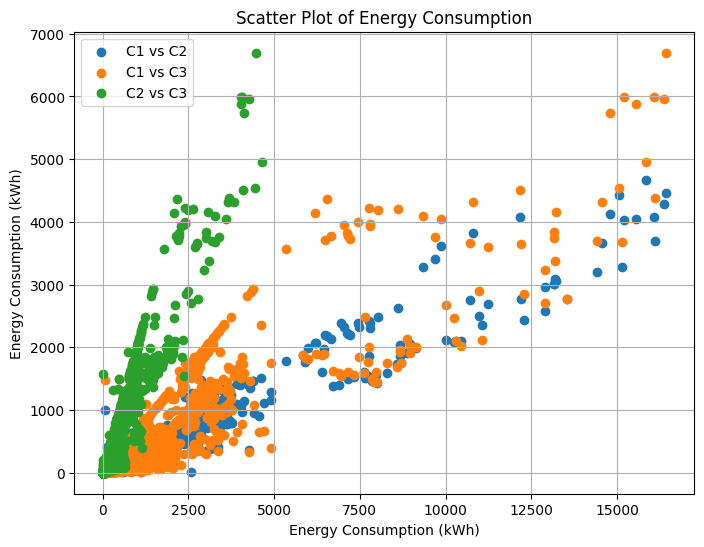

In [45]:
# prompt: to scatter plot C1(kWh) , C2(kWh) and C3(kWh)

import matplotlib.pyplot as plt

# Assuming 'df' is your DataFrame as defined in the provided code.

plt.figure(figsize=(8, 6))
plt.scatter(df['C1 (kWh)'], df['C2 (kWh)'], label='C1 vs C2')
plt.scatter(df['C1 (kWh)'], df['C3  (kWh)'], label='C1 vs C3')
plt.scatter(df['C2 (kWh)'], df['C3  (kWh)'], label='C2 vs C3')

plt.xlabel('Energy Consumption (kWh)')
plt.ylabel('Energy Consumption (kWh)')
plt.title('Scatter Plot of Energy Consumption')
plt.legend()
plt.grid(True)
plt.show()


In [46]:
# prompt: to cluster the data using KMeans

# Select relevant features for clustering
features = ['C1 (kWh)', 'C2 (kWh)', 'C3  (kWh)']
X = df[features]
X


,C1 (kWh),C2 (kWh),C3 (kWh)
0,3441.40,762.60,996.80
1,1088.80,366.80,130.20
2,807.28,78.24,148.16
3,2317.60,689.60,1312.00
4,0.00,0.00,0.00
...,...,...,...
1940,1049.20,297.60,341.00
1941,630.10,163.50,109.00
1942,1120.00,340.40,463.60
1943,2412.40,1208.00,1741.80


In [47]:
# Scale the data
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

X_scaled



array([[0.20939204, 0.16354278, 0.14882943],
       [0.06624805, 0.07866181, 0.0194398 ],
       [0.04911896, 0.0167789 , 0.02212136],
       ...,
       [0.06814642, 0.07300021, 0.06921882],
       [0.14678252, 0.25906069, 0.26006331],
       [0.00402794, 0.01230967, 0.02559126]])

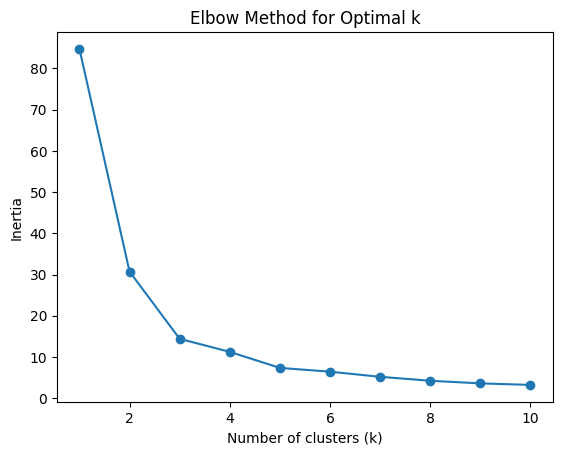

In [48]:
# Determine optimal number of clusters (e.g., using the Elbow method)
inertia = []
for k in range(1, 11):  # Test k values from 1 to 10
    kmeans = KMeans(n_clusters=k, random_state=42)  # Use a consistent random state
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

# Plot the Elbow method results
plt.plot(range(1, 11), inertia, marker='o')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.show()



Cluster Centroids:
[[0.03466754 0.03066761 0.02329235]
 [0.66571273 0.61174807 0.55384868]
 [0.19928828 0.20363611 0.20522854]]


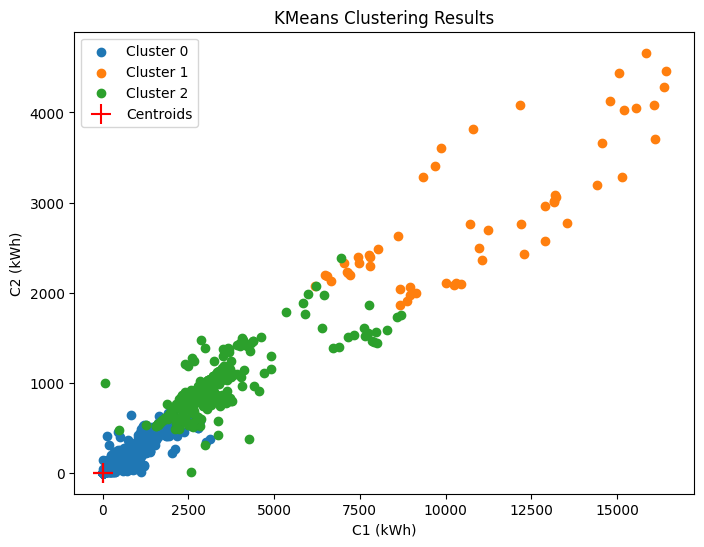

In [49]:
# Based on the Elbow method plot, choose the optimal k
optimal_k = 3 # Example: Choose 3 clusters based on the elbow point.  Change as needed.

# Apply KMeans with the chosen k
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
df['Cluster'] = kmeans.fit_predict(X_scaled)

# Analyze the clusters (e.g., visualize cluster centroids)
centroids = kmeans.cluster_centers_
print("Cluster Centroids:")
print(centroids)

# Visualize the clusters (example: 2D scatter plot of first two features)
plt.figure(figsize=(8, 6))
for i in range(optimal_k):
    cluster_data = df[df['Cluster'] == i]
    plt.scatter(cluster_data['C1 (kWh)'], cluster_data['C2 (kWh)'], label=f'Cluster {i}')
plt.scatter(centroids[:, 0], centroids[:, 1], s=200, c='red', marker='+', label='Centroids')
plt.xlabel('C1 (kWh)')
plt.ylabel('C2 (kWh)')
plt.title('KMeans Clustering Results')
plt.legend()
plt.show()


In [50]:
kmeans.inertia_

14.393905042382663

Cluster Centroids:
[[0.03466754 0.03066761 0.02329235]
 [0.66571273 0.61174807 0.55384868]
 [0.19928828 0.20363611 0.20522854]]


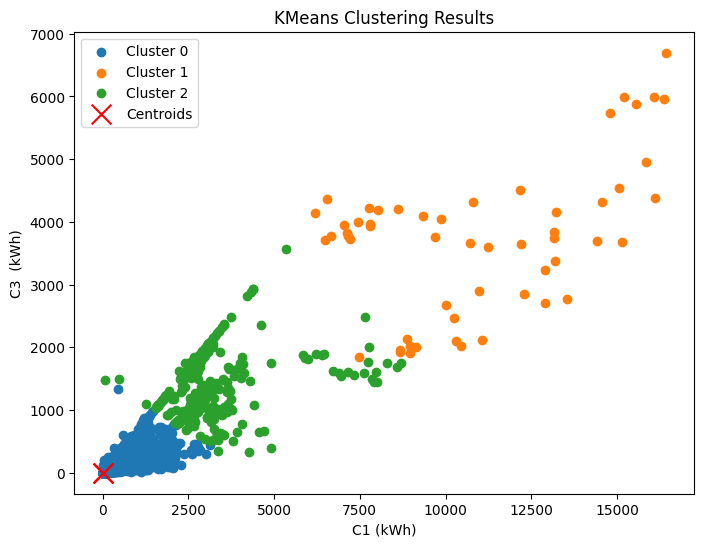

In [51]:
centroids = kmeans.cluster_centers_
print("Cluster Centroids:")
print(centroids)
plt.figure(figsize=(8, 6))
for i in range(optimal_k):
    cluster_data = df[df['Cluster'] == i]
    plt.scatter(cluster_data['C1 (kWh)'], cluster_data['C3  (kWh)'], label=f'Cluster {i}')
plt.scatter(centroids[:, 0], centroids[:, 1], s=200, c='red', marker='x', label='Centroids')
plt.xlabel('C1 (kWh)')
plt.ylabel('C3  (kWh)')
plt.title('KMeans Clustering Results')
plt.legend()
plt.show()

In [52]:
kmeans.inertia_

14.393905042382663

Cluster Centroids:
[[0.03466754 0.03066761 0.02329235]
 [0.66571273 0.61174807 0.55384868]
 [0.19928828 0.20363611 0.20522854]]


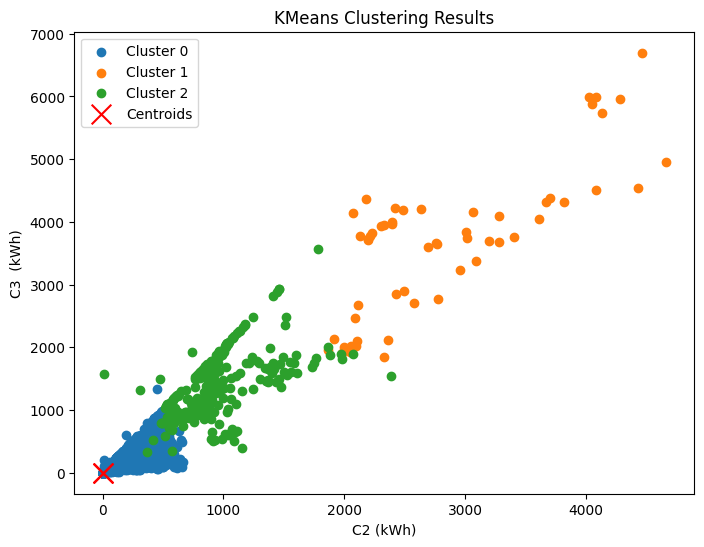

In [53]:
centroids = kmeans.cluster_centers_
print("Cluster Centroids:")
print(centroids)
plt.figure(figsize=(8, 6))
for i in range(optimal_k):
    cluster_data = df[df['Cluster'] == i]
    plt.scatter(cluster_data['C2 (kWh)'], cluster_data['C3  (kWh)'], label=f'Cluster {i}')
plt.scatter(centroids[:, 0], centroids[:, 1], s=200, c='red', marker='x', label='Centroids')
plt.xlabel('C2 (kWh)')
plt.ylabel('C3  (kWh)')
plt.title('KMeans Clustering Results')
plt.legend()
plt.show()

In [54]:
kmeans.inertia_

14.393905042382663

Cluster Centroids:
[[0.03466754 0.03066761 0.02329235]
 [0.66571273 0.61174807 0.55384868]
 [0.19928828 0.20363611 0.20522854]]


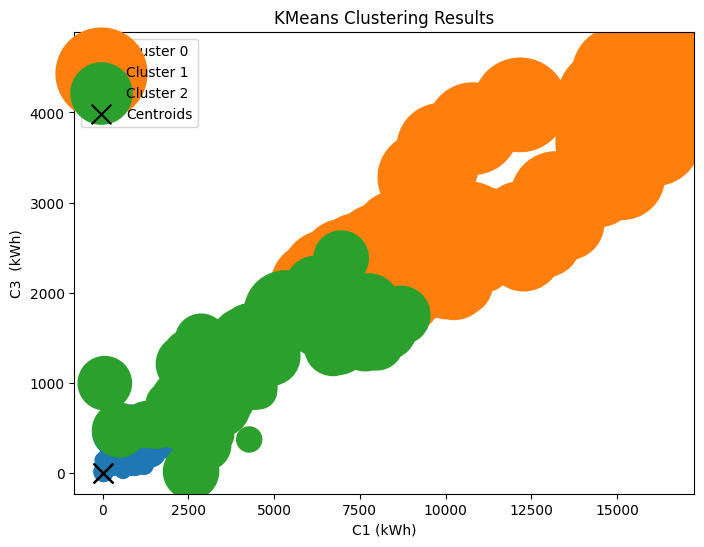

In [55]:
centroids = kmeans.cluster_centers_
print("Cluster Centroids:")
print(centroids)
plt.figure(figsize=(8, 6))
for i in range(optimal_k):
    cluster_data = df[df['Cluster'] == i]
    plt.scatter(cluster_data['C1 (kWh)'],cluster_data['C2 (kWh)'], cluster_data['C3  (kWh)'], label=f'Cluster {i}')
plt.scatter(centroids[:, 0], centroids[:, 1], s=200, c='black', marker='x', label='Centroids')
plt.xlabel('C1 (kWh)')
plt.ylabel('C3  (kWh)')
plt.title('KMeans Clustering Results')
plt.legend()
plt.show()

In [56]:
kmeans.inertia_

14.393905042382663

In [57]:
# prompt: to cluster the data using KMeans

# Select relevant features for clustering
features = ['C1 Maximum Demand (kVA)', 'C2 Maximum Demand (kVA)', 'C3 Maximum Demand (kVA)']
X = df[features]
X

,C1 Maximum Demand (kVA),C2 Maximum Demand (kVA),C3 Maximum Demand (kVA)
0,16.440,13.90,5.960
1,7.040,6.72,5.780
2,3.952,1.22,0.712
3,9.400,7.22,6.120
4,0.000,0.00,0.000
...,...,...,...
1940,4.900,4.70,2.500
1941,3.600,3.70,1.200
1942,6.000,6.20,4.200
1943,14.600,14.40,14.600


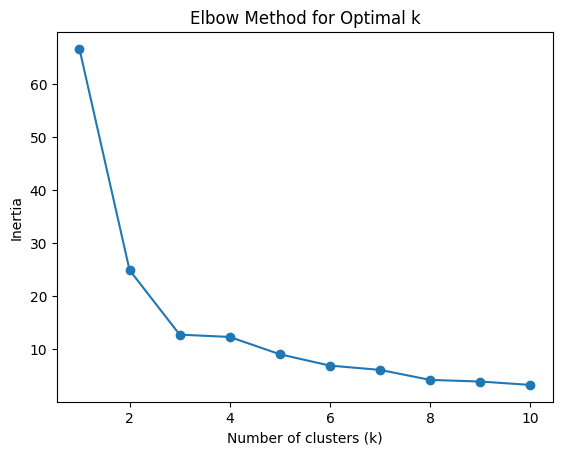

In [58]:
# Determine optimal number of clusters (e.g., using the Elbow method)
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

inertia = []
for k in range(1, 11):  # Test k values from 1 to 10
    kmeans = KMeans(n_clusters=k, random_state=42)  # Use a consistent random state
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

# Plot the Elbow method results
plt.plot(range(1, 11), inertia, marker='o')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.show()


Cluster Centroids:
[[0.03746649 0.0296599  0.02290423]
 [0.22015914 0.18831372 0.16551136]
 [0.78102586 0.595999   0.32359614]]


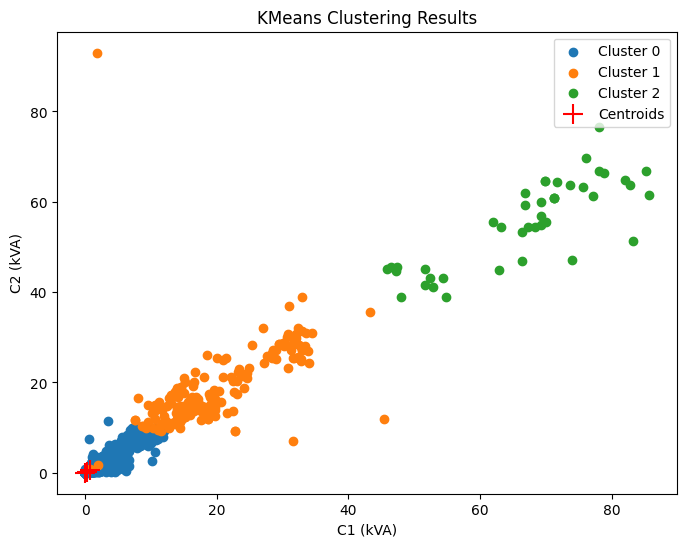

In [59]:
# Based on the Elbow method plot, choose the optimal k
optimal_k = 3 # Example: Choose 3 clusters based on the elbow point.  Change as needed.

# Apply KMeans with the chosen k
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
df['Cluster'] = kmeans.fit_predict(X_scaled)

# Analyze the clusters (e.g., visualize cluster centroids)
centroids = kmeans.cluster_centers_
print("Cluster Centroids:")
print(centroids)

# Visualize the clusters (example: 2D scatter plot of first two features)
plt.figure(figsize=(8, 6))
for i in range(optimal_k):
    cluster_data = df[df['Cluster'] == i]
    plt.scatter(cluster_data['C1 Maximum Demand (kVA)'], cluster_data['C2 Maximum Demand (kVA)'], label=f'Cluster {i}')
plt.scatter(centroids[:, 0], centroids[:, 1], s=200, c='red', marker='+', label='Centroids')
plt.xlabel('C1 (kVA)')
plt.ylabel('C2 (kVA)')
plt.title('KMeans Clustering Results')
plt.legend()
plt.show()


In [60]:
kmeans.inertia_

12.698655160991617

Cluster Centroids:
[[0.03746649 0.0296599  0.02290423]
 [0.22015914 0.18831372 0.16551136]
 [0.78102586 0.595999   0.32359614]]


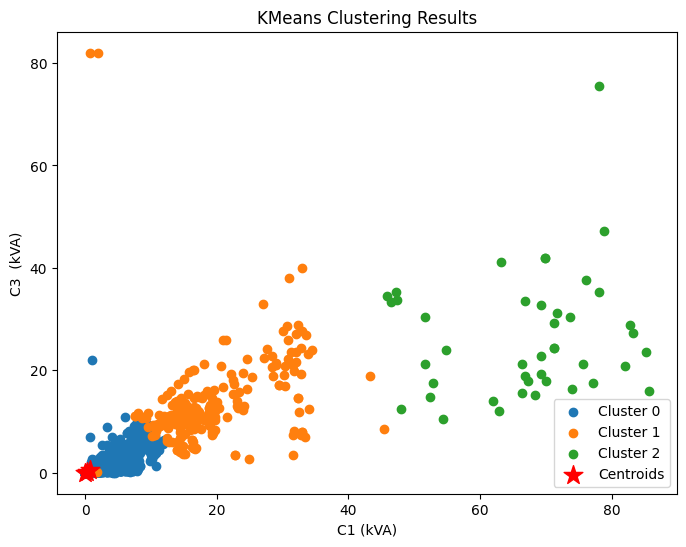

In [61]:
centroids = kmeans.cluster_centers_
print("Cluster Centroids:")
print(centroids)
plt.figure(figsize=(8, 6))
for i in range(optimal_k):
    cluster_data = df[df['Cluster'] == i]
    plt.scatter(cluster_data['C1 Maximum Demand (kVA)'], cluster_data['C3 Maximum Demand (kVA)'], label=f'Cluster {i}')
plt.scatter(centroids[:, 0], centroids[:, 1], s=200, c='red', marker='*', label='Centroids')
plt.xlabel('C1 (kVA)')
plt.ylabel('C3  (kVA)')
plt.title('KMeans Clustering Results')
plt.legend()
plt.show()

In [62]:
kmeans.inertia_

12.698655160991617

Cluster Centroids:
[[0.03746649 0.0296599  0.02290423]
 [0.22015914 0.18831372 0.16551136]
 [0.78102586 0.595999   0.32359614]]


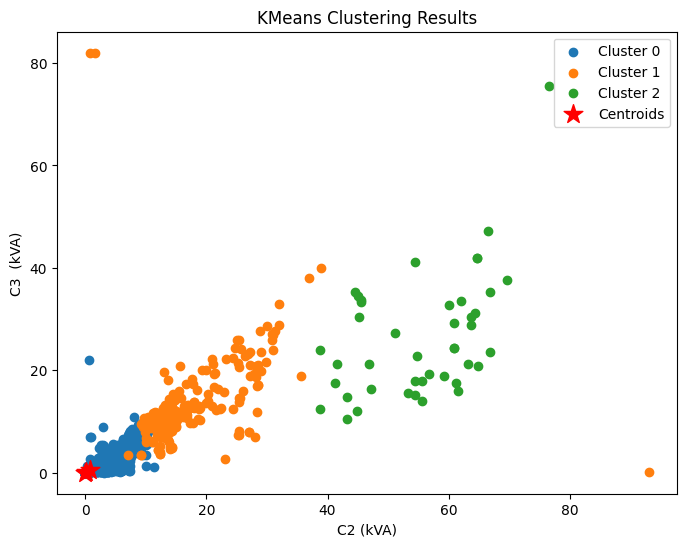

In [63]:
centroids = kmeans.cluster_centers_
print("Cluster Centroids:")
print(centroids)
plt.figure(figsize=(8, 6))
for i in range(optimal_k):
    cluster_data = df[df['Cluster'] == i]
    plt.scatter(cluster_data['C2 Maximum Demand (kVA)'], cluster_data['C3 Maximum Demand (kVA)'], label=f'Cluster {i}')
plt.scatter(centroids[:, 0], centroids[:, 1], s=200, c='red', marker='*', label='Centroids')
plt.xlabel('C2 (kVA)')
plt.ylabel('C3  (kVA)')
plt.title('KMeans Clustering Results')
plt.legend()
plt.show()

In [64]:
kmeans.inertia_

12.698655160991617